In [1]:
import pandas as pd
import numpy as np
import tensorflow 
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set()
from tensorflow.keras.layers import Dense,LSTM,Input,RepeatVector, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, auc, roc_curve

In [2]:
df = pd.read_csv('C:/Users/HP/dataset/creditcard.csv')

In [3]:
df_selected = df.drop(['V15','V17','V24','V27','Time'], axis = 1)
df_selected.shape

(284807, 26)

In [4]:
predictors = df_selected.drop(["Class"], axis = 1)
target = df_selected["Class"]

In [5]:
predictors.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V25,V26,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.128539,-0.189115,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,0.167170,0.125895,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.327642,-0.139097,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,0.647376,-0.221929,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,-0.206010,0.502292,0.215153,69.99


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas")
X_train_sc = scaler.fit_transform(predictors)

In [7]:
X_train_sc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V25,V26,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.585122,0.394557,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.587290,0.446013,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.559515,0.402727,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.614245,0.389197,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.566343,0.507497,0.317490,0.002724


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_sc, target, 
    stratify = target, 
    random_state = 13, 
    test_size = 0.2)

In [9]:
X_val = X_test[:3000]
y_val = y_test[:3000]
X_test = X_test[3000:]
y_test = y_test[3000:]
X_train_0 = X_train[y_train != 1]
y_train_0 = y_train[y_train != 1]
X_test_0 = X_test[y_test != 1]
X_val_0 = X_val[y_val != 1]
y_train_0 = y_train[y_train != 1]

In [389]:
X_train_1 = X_train[y_train == 1]
y_train_1 = y_train[y_train == 1]
X_test_1 = X_test[y_test == 1]
X_val_1 = X_val[y_val == 1]
y_train_1 = y_train[y_train == 1]

In [10]:
def arr_reshape(x, arr_type = "float32"):
    return np.asarray(x).astype(arr_type).reshape((-1, 1, x.shape[1]))
def flatten(arr):
    return arr.reshape(-1, arr.shape[-1])
def mse_3d(x, y):
    return np.mean(np.power(flatten(x) - flatten(y), 2), axis = 1)

In [11]:
reshaped_train_0 = arr_reshape(X_train_0)
reshaped_val_0 = arr_reshape(X_val_0)
reshaped_test_0 = arr_reshape(X_test_0)
reshaped_val = arr_reshape(X_val)
reshaped_test = arr_reshape(X_test)
reshaped_train = arr_reshape(X_train)

In [390]:
reshaped_train_1 = arr_reshape(X_train_1)
reshaped_val_1 = arr_reshape(X_val_1)
reshaped_test_1 = arr_reshape(X_test_1)

In [12]:
inputs_dim = reshaped_train_0.shape[2]
print(inputs_dim)

25


In [264]:
def build_model(n_dims):
        inputs = Input(shape = (1, n_dims))
        e = LSTM(16, activation = "relu", return_sequences = True)(inputs)
        bottleneck = LSTM(8, activation = "relu", 
                               return_sequences = False, 
                               name = "Bottleneck")(e)
        e = RepeatVector(1)(bottleneck)
        decoder = LSTM(8, activation = "relu", 
                       return_sequences = True)(e)
        decoder = LSTM(16, activation = "relu", return_sequences = True)(decoder)
        outputs = TimeDistributed(Dense(n_dims))(decoder)
        model = Model(inputs = inputs, outputs = outputs)
        return model

In [265]:
model = build_model(inputs_dim)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 25)]           0         
                                                                 
 lstm_18 (LSTM)              (None, 1, 16)             2688      
                                                                 
 Bottleneck (LSTM)           (None, 8)                 800       
                                                                 
 repeat_vector_6 (RepeatVect  (None, 1, 8)             0         
 or)                                                             
                                                                 
 lstm_19 (LSTM)              (None, 1, 8)              544       
                                                                 
 lstm_20 (LSTM)              (None, 1, 16)             1600      
                                                           

In [270]:
def compile_model(model, lr = 0.0002, loss = "mse", opt = "adam"):
    if opt == "adam":
        opt = optimizers.Adam(learning_rate = lr)
    else:
        opt = optimizers.SGD(learning_rate = lr)
    model.compile(loss = loss, optimizer = opt)
    
    
def callbacks(**kwargs):
    mc = ModelCheckpoint(filepath = kwargs.get("filename"), save_best_only = True, verbose = 0)
    es = EarlyStopping(monitor = kwargs.get("monitor"), patience = kwargs.get("patience"))
    return mc,es
        
def train(model, x, y, x_val = None, y_val = None,  n_epochs = 15, batch_size = 32, verbose = 1, callbacks = None):
    if x_val is not None:
        model.fit(x, y, validation_split = 0.2,epochs = n_epochs, verbose = verbose,batch_size = batch_size)
    else:
        model.fit(x, y, validation_data = (x_val, y_val),epochs = n_epochs, verbose = verbose,batch_size = batch_size, callbacks = [mc, es])
    

In [271]:
mc,es = callbacks(filename = "./lstm_autoenc.h5", patience = 2, monitor = "val_loss")
compile_model(model)
train(model,reshaped_train_0, reshaped_train_0, reshaped_val_0, reshaped_val_0, n_epochs = 10)

Epoch 1/10
5331/5331 [==============================] - 22s 3ms/step - loss: 7.9564e-04 - val_loss: 7.6021e-04
Epoch 2/10
5331/5331 [==============================] - 18s 3ms/step - loss: 7.3184e-04 - val_loss: 6.9284e-04
Epoch 3/10
5331/5331 [==============================] - 19s 4ms/step - loss: 6.9037e-04 - val_loss: 6.7553e-04
Epoch 4/10
5331/5331 [==============================] - 19s 4ms/step - loss: 6.8037e-04 - val_loss: 6.6905e-04
Epoch 5/10
5331/5331 [==============================] - 20s 4ms/step - loss: 6.7612e-04 - val_loss: 6.6611e-04
Epoch 6/10
5331/5331 [==============================] - 19s 4ms/step - loss: 6.7344e-04 - val_loss: 6.6363e-04
Epoch 7/10
5331/5331 [==============================] - 20s 4ms/step - loss: 6.7148e-04 - val_loss: 6.6216e-04
Epoch 8/10
5331/5331 [==============================] - 20s 4ms/step - loss: 6.6977e-04 - val_loss: 6.6060e-04
Epoch 9/10
5331/5331 [==============================] - 20s 4ms/step - loss: 6.6834e-04 - val_loss: 6.5961e-04
E

In [272]:
def predict(model, xtest):
    return model.predict(xtest)
    
def predict_class(x_test, predicted, threshold):
    mse = mse_3d(x_test, predicted)
    return 1 * (mse > threshold)

In [273]:
reconstructed = model.predict(reshaped_train_0)
train_loss = losses.mse(reconstructed, reshaped_train_0).numpy()

6664/6664 [==============================] - 10s 1ms/step


In [332]:
cut_off_1 = np.percentile(train_loss, 99)
cut_off_1

0.0031505557126365567

In [353]:
test_preds = predict(model,reshaped_test)
test_mse = mse_3d(reshaped_test, test_preds)
test_error = pd.DataFrame({"mse": test_mse,
                        "actual": y_test})

2132/2132 [==============================] - 3s 1ms/step


In [354]:
pred_y = predict_class(reshaped_test, test_preds,cut_off_1)
conf_matrix = confusion_matrix(y_test, pred_y)

In [398]:
y_test.value_counts()

0    68085
1      117
Name: Class, dtype: int64

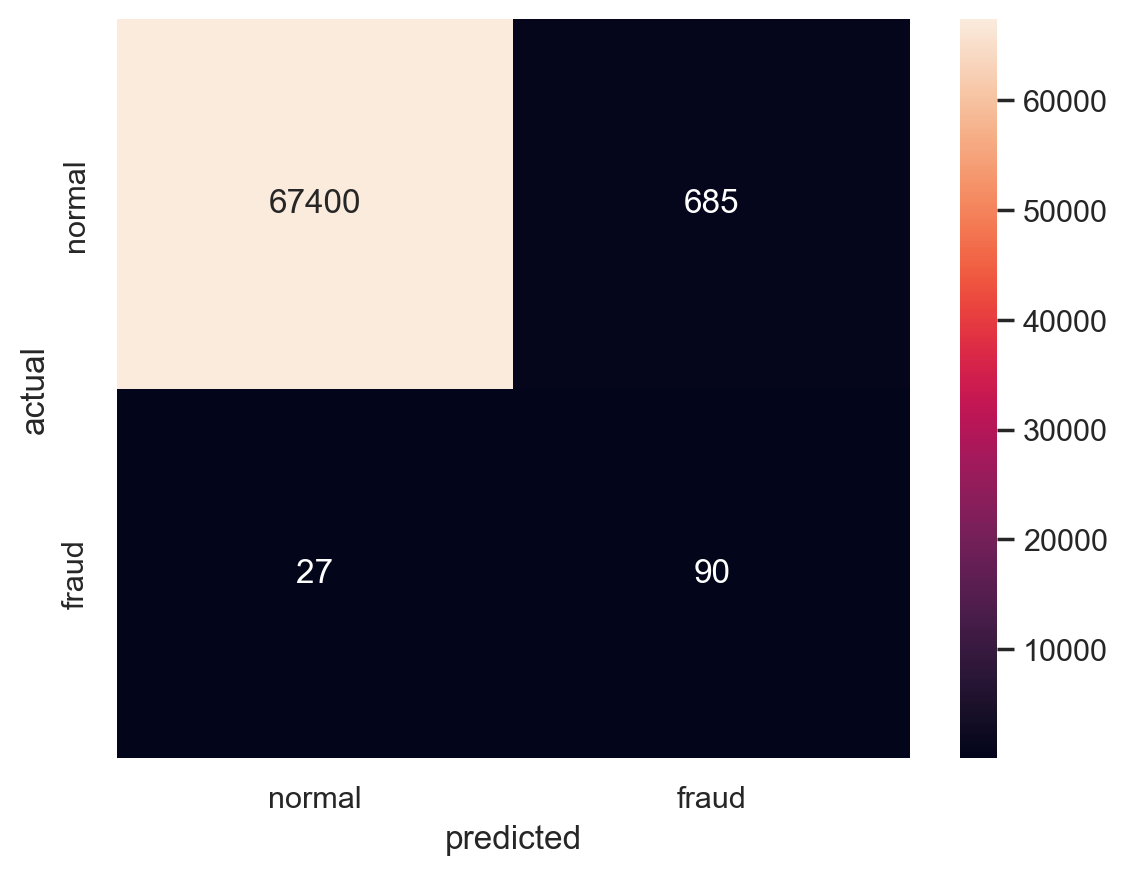

In [356]:
sns.heatmap(conf_matrix, 
            xticklabels = ["normal", "fraud"], 
            yticklabels=["normal", "fraud"], 
            annot = True, fmt = "d")
plt.ylabel("actual")
plt.xlabel("predicted")
plt.show()

4/4 [==============================] - 0s 2ms/step


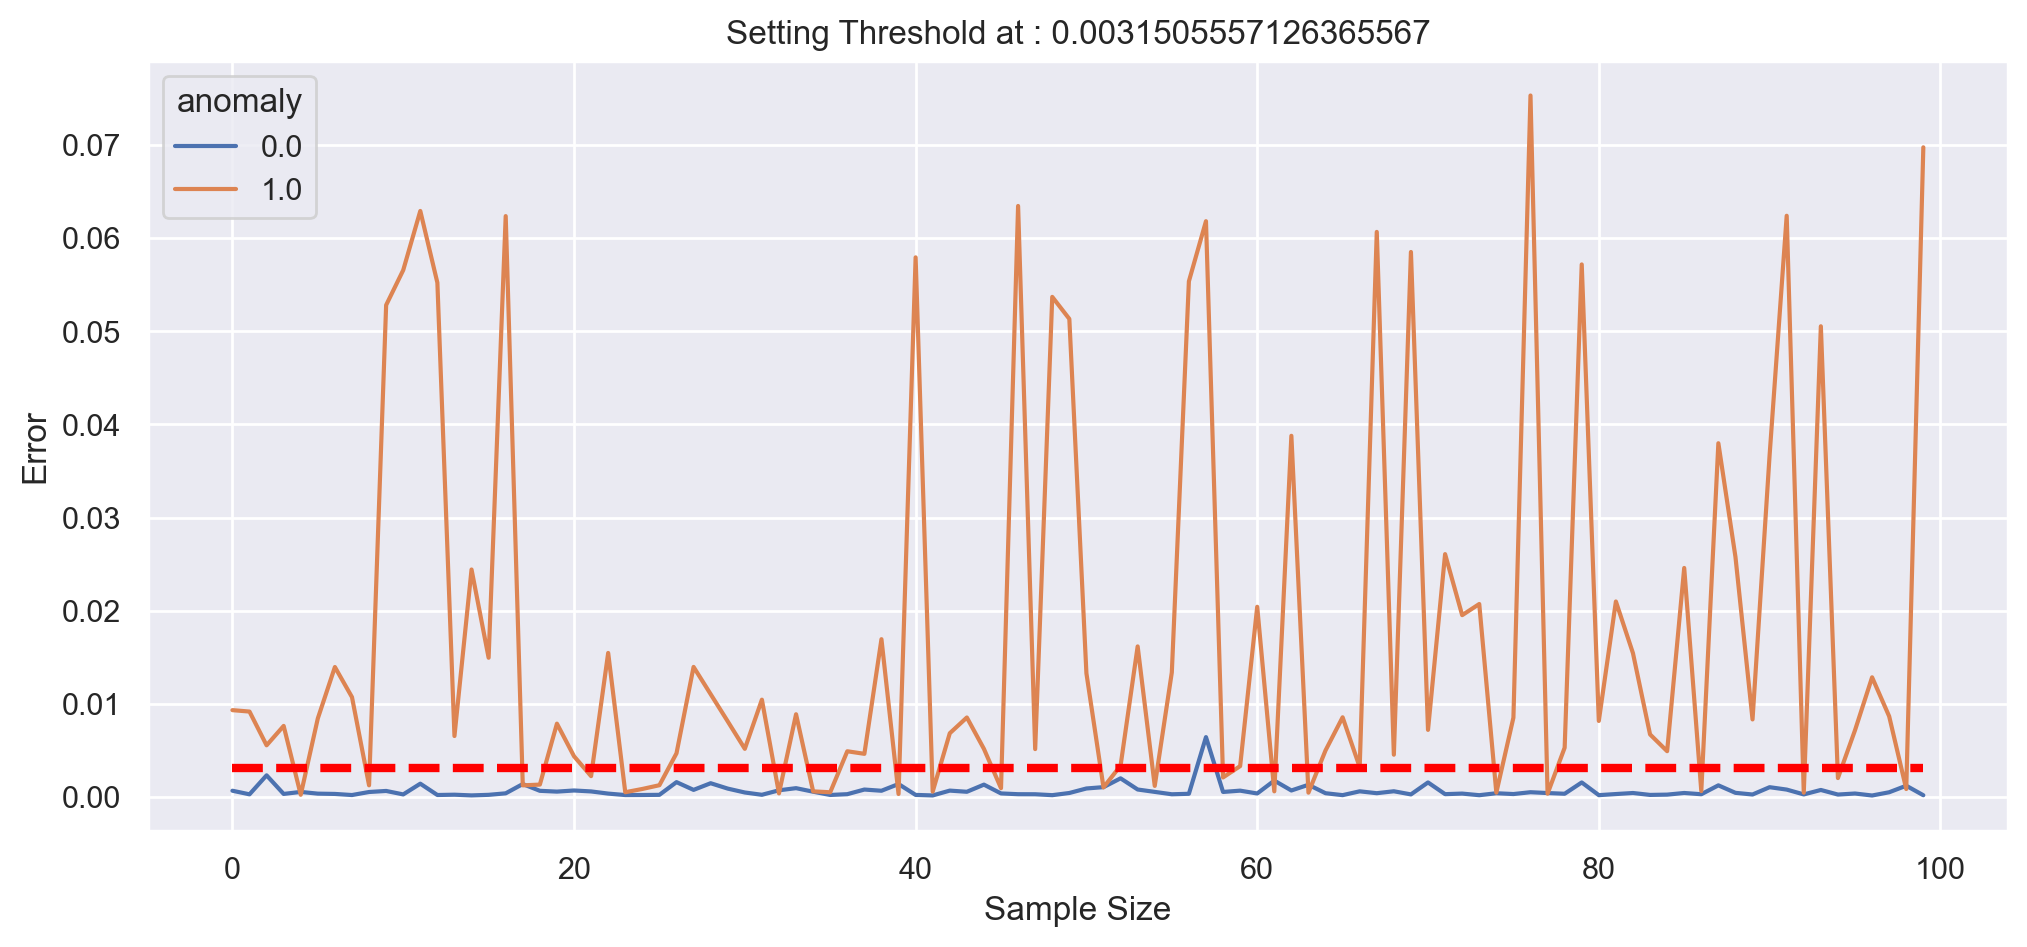

In [397]:
from matplotlib import lines
plot_samples = 100
plt.figure(figsize=(12,5))

# normal event
n_features = 25
real_x = X_test_0[:plot_samples]
test_preds = predict(model,arr_reshape(real_x))
test_mse = mse_3d(arr_reshape(real_x), test_preds)
normal_events_df = pd.DataFrame({'Error': test_mse,'Sample Size': np.arange(0, plot_samples),'anomaly': np.zeros(plot_samples)})

abnormal_x = X_test_1[:plot_samples]
predicted_x =  predict(model,arr_reshape(abnormal_x))
test_mse = mse_3d(arr_reshape(abnormal_x), predicted_x)
abnormal_events_df = pd.DataFrame({'Error': test_mse,'Sample Size': np.arange(0, plot_samples),'anomaly': np.ones(plot_samples)})

mae_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mae_df['Sample Size'], y=mae_df['Error'], hue=mae_df.anomaly)

line = lines.Line2D(xdata=np.arange(0, plot_samples),ydata=np.full(plot_samples, cut_off_1),color='red',linewidth=3,linestyle='dashed')

plot.add_artist(line)
plt.title('Setting Threshold at : {threshold}'.format(threshold=cut_off_1))
plt.show()
